## 1. Deslocamento Circular e Convolução Circular com DFT

1.1 Deslocamento Circular:

Dada uma sequência finita $x(n)$ de tamanho $N$, o deslocamento circular de $m$ amostras é:

$$
x_{desl}(n) = x[(n-m) \mod N]
$$

Na DFT, isso corresponde a multiplicar por uma exponencial complexa:

$$
X_{desl}(k) = e^{-j\frac{2\pi k}{N}m}X[k]
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from funcoes import zero_padding, fft_dec

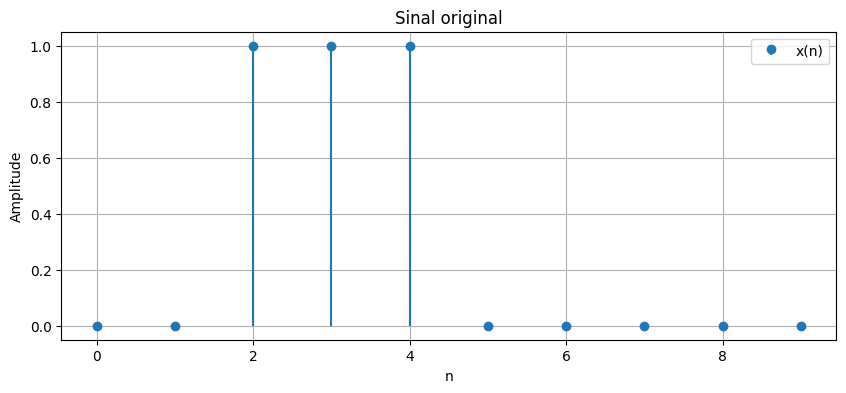

In [4]:
# Sinal
N = 10
n = np.arange(N)
x = np.zeros(N)
x[2:5] = 1  # Pulso retangular

# Deslocamento circular (m = 3)
m = 3
x_desl = np.roll(x, m)  # Usando np.roll para deslocamento circular

plt.figure(figsize=(10, 4))
plt.stem(n, x, label='x(n)', basefmt=' ')
plt.title("Sinal original")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

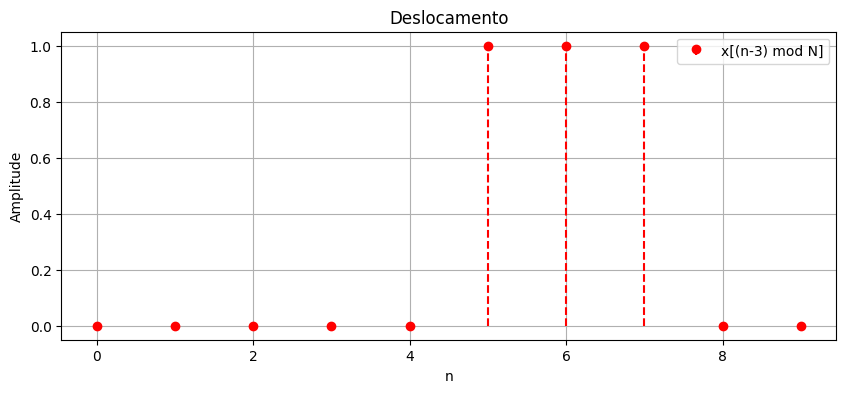

In [5]:
plt.figure(figsize=(10, 4))
plt.stem(n, x_desl, label=f'x[(n-{m}) mod N]', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Deslocamento")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

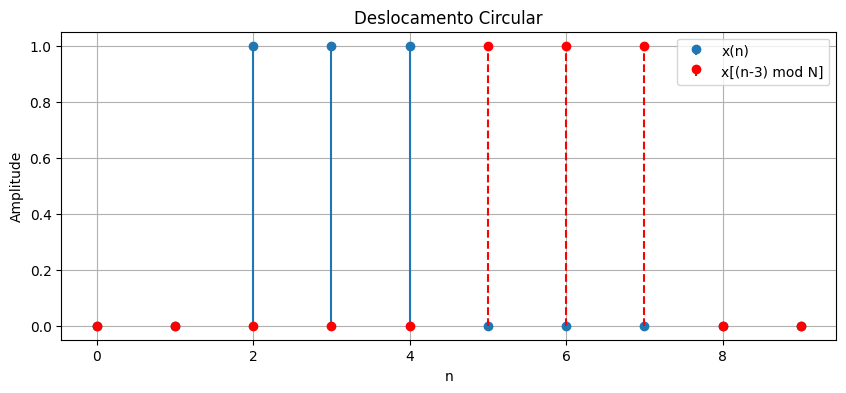

In [6]:
plt.figure(figsize=(10, 4))
plt.stem(n, x, label='x(n)', basefmt=' ')
plt.stem(n, x_desl, label=f'x[(n-{m}) mod N]', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Deslocamento Circular")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

## 2. Convolução Circular

2.1 Definição: A convolução circular entre $x(n)$ e $h(n)$ (ambos com tamanho N) é dado por

$$
y(n) = \sum_{m=0}^{N-1} x(m)h[(n-m) \mod N]
$$

Equivale a multiplicar as DFTs:

$$
Y[k] = X[k]H[k]
$$

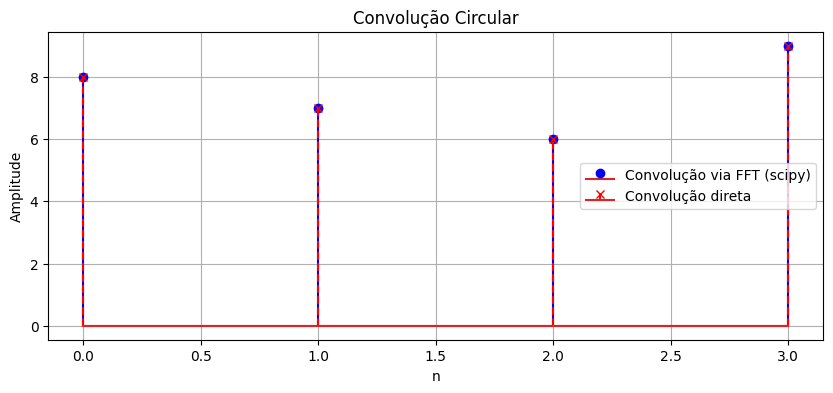

In [7]:
# Sinais x(n) e h(n)
x = np.array([1, 2, 3, 4])
h = np.array([1, 1, 1, 0])

N = len(x)

X = fft(x)
H = fft(h)

# Convolução circular via FFT do scipy
Y = X * H
y = ifft(Y).real  # Parte real

# Convolução circular direta
y_direto = np.zeros(N)
for n in range(N):
    for m in range(N):
        y_direto[n] += x[m] * h[(n - m) % N]

plt.figure(figsize=(10, 4))
plt.stem(y, label='Convolução via FFT (scipy)', linefmt='b-', markerfmt='bo')
plt.stem(y_direto, label='Convolução direta', linefmt='r--', markerfmt='rx')
plt.title("Convolução Circular")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

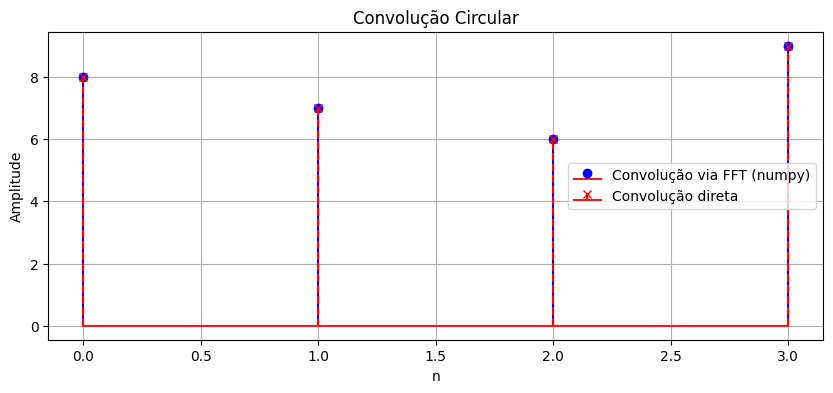

In [8]:
X = np.fft.fft(x)
H = np.fft.fft(h)

# Convolução circular via FFT do numpy
Y = X * H
y = np.fft.ifft(Y).real

plt.figure(figsize=(10, 4))
plt.stem(y, label='Convolução via FFT (numpy)', linefmt='b-', markerfmt='bo')
plt.stem(y_direto, label='Convolução direta', linefmt='r--', markerfmt='rx')
plt.title("Convolução Circular")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

## 3. Convolução Linear via Convolução Circular com DFT

3.1 A convolução circular (via DFT) só é equivalente à convolução linear se:

O tamanho da DFT N satisfizer $ N \geq L + M - 1$, onde:
- L = comprimento de $x(n)$,
- M = comprimento de $h(n)$.

Zero-padding é aplicado para estender $x(n)$ e $h(n)$ para N amostras.

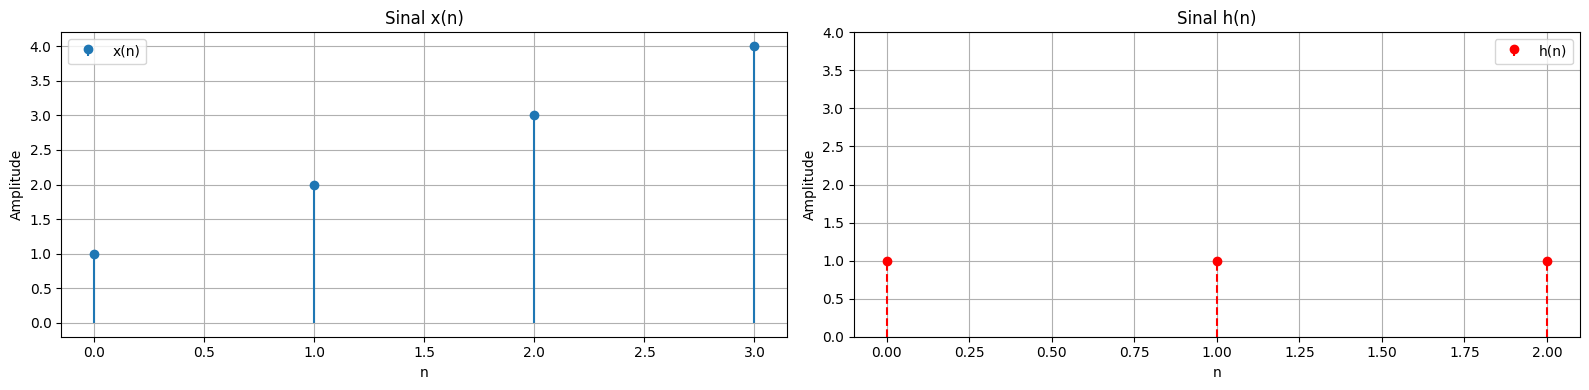

In [9]:
x = np.array([1, 2, 3, 4])       # Sinal x(n) (L = 4)
h = np.array([1, 1, 1])          # Sinal h(n) (M = 3)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.stem(x, label='x(n)', basefmt=' ')
plt.title("Sinal x(n)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(h, label='h(n)', markerfmt='ro', linefmt='r--', basefmt=' ')
plt.title("Sinal h(n)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.ylim([0,4])
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Convolução Linear (Direta)

Convolução linear: [1 3 6 9 7 4]


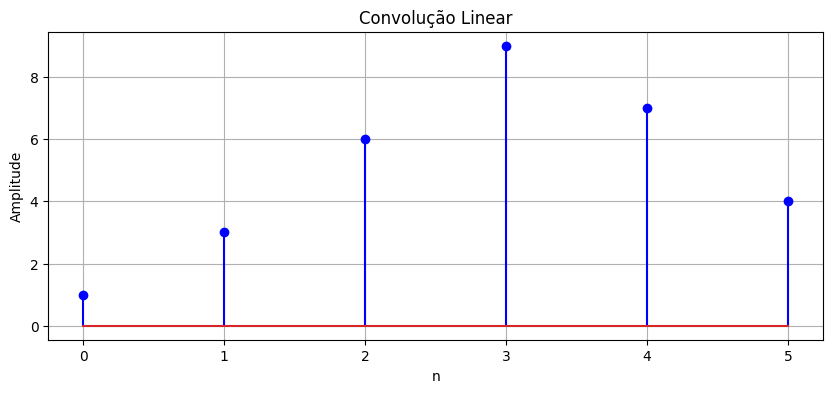

In [10]:
y_linear = np.convolve(x, h, mode='full')  # Convolução linear padrão
print("Convolução linear:", y_linear)

plt.figure(figsize=(10, 4))
plt.stem(y_linear, linefmt='b-', markerfmt='bo')
plt.title("Convolução Linear")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Convolução Circular sem Zero-Padding

Convolução circular (N=4): [8. 7. 6. 9.]


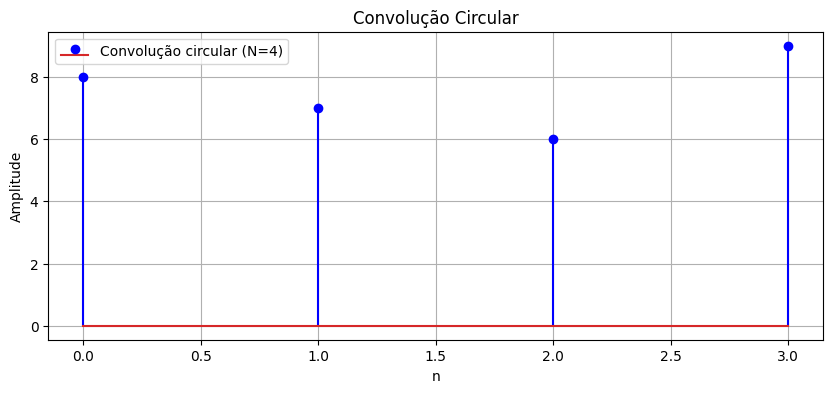

In [11]:
N = max(len(x), len(h))  # N = 4 (insuficiente)
X = fft(x, N)
H = fft(h, N)
Y_circular = X * H
y_circular = ifft(Y_circular).real

print("Convolução circular (N=4):", y_circular)

plt.figure(figsize=(10, 4))
plt.stem(y_circular, label='Convolução circular (N=4)', linefmt='b-', markerfmt='bo')
plt.title("Convolução Circular")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
N_min = len(x) + len(h) - 1  # N = 6
x_padded = np.pad(x, (0, N_min - len(x)))  # [1, 2, 3, 4, 0, 0]
h_padded = np.pad(h, (0, N_min - len(h)))   # [1, 1, 1, 0, 0, 0]

X = fft(x_padded)
H = fft(h_padded)
Y = X * H
y_linear_via_dft = ifft(Y).real

print("Convolução linear via DFT:", y_linear_via_dft)



Convolução linear via DFT: [1. 3. 6. 9. 7. 4.]


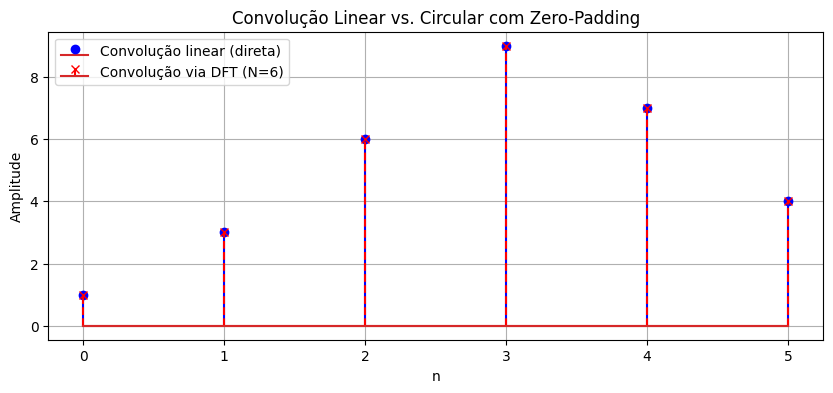

In [13]:
plt.figure(figsize=(10, 4))
plt.stem(y_linear, label='Convolução linear (direta)', linefmt='b-', markerfmt='bo')
plt.stem(y_linear_via_dft, label='Convolução via DFT (N=6)', linefmt='r--', markerfmt='rx')
plt.title("Convolução Linear vs. Circular com Zero-Padding")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Para que a convolução circular seja equivalente à linear:

$$
\sum_{k=n+1}^{N-1}x(k)h(n-k+N) = 0, \forall n.
$$

Isso ocorre se:

1. $x(n) = 0$ para $n \geq L$,

2. $h(n) = 0$ para $n \geq M$,
3. $N \geq L + M -1$

Zero-Padding

- Estende $x(n)$ com $M - 1$ zeros.

- Estende $h(n)$ com $L - 1$ zeros.

## Método Overlap-Add
Usado quando:

- Um sinal de entrada $x(n)$ é muito grande

- O filtro $h(n)$ é limitado com comprimento L

- Dividi-se $x(n)$ em blocos menores, processando cada bloco separadamente via DFT/FFT (evitando aliasing com zero-padding) e depois combinamos os resultados, somando as regiões de sobreposição

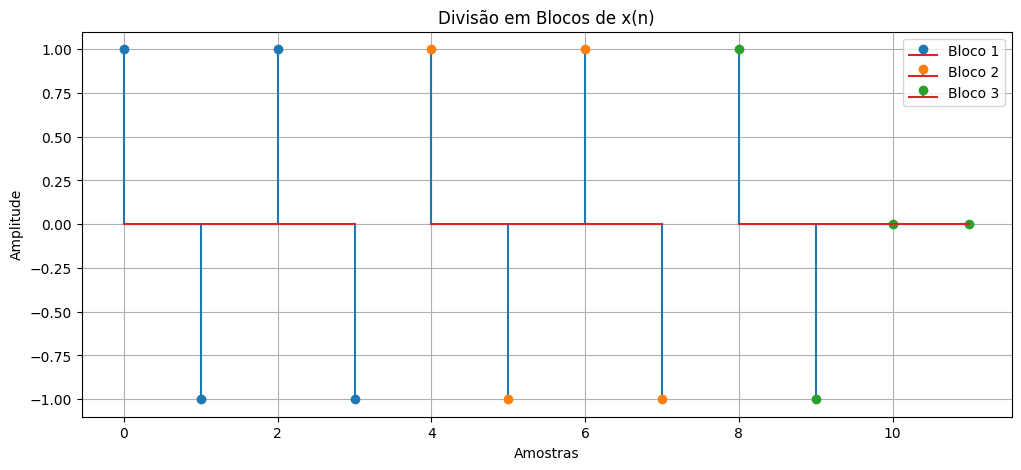

In [14]:
x_n = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1, -1]) # M = 10
h_n = np.array([1, 1]) # L =2

L = len(h_n)
M0 = 4 # Tamanho de cada bloco (M0)

num_blocos = int(np.ceil(len(x_n) / M0)) # númnero de blocos arredodado para cima (= 3 blocos)

x_n_padded = zero_padding(x_n, num_blocos * M0 - len(x_n)) # Zero-padding no último bloco 

blocos = np.array_split(x_n_padded, num_blocos) # Divisão em 3 blocos de 4 elementos cada

plt.figure(figsize=(12, 5))
for i, bloco in enumerate(blocos):
    plt.stem(range(i*M0, i*M0 + len(bloco)), bloco, label=f'Bloco {i+1}', linefmt='')
plt.title('Divisão em Blocos de x(n)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

h_padded = zero_padding(h_n, M0) # adicionar zeros ao h(n) até o tamanho do bloco (M0 = 4)
h_padded = zero_padding(h_padded) # garantir que seja potencia de 2 para poder calcular com a fft implementada
H = fft_dec(h_padded)

# armazenar as saídas dos blocos
y_blocos = []


L = len(h_n)
N = M0 + L - 1 # comprimento da saida da convolução de cada bloco (4 + 2 - 1 = 5)

for bloco in blocos:
    # Zero-padding no bloco para tamanho N
    x_bloco_padded = zero_padding(bloco, N - len(bloco))
    x_bloco_padded = zero_padding(x_bloco_padded)

    # FFT do bloco
    X = fft_dec(x_bloco_padded)

    # Multiplicação no domínio da frequência
    Y = X * H

    # retornar ao domínio do tempo com IFFT
    y_bloco = ifft(Y).real

    y_blocos.append(y_bloco)

# inicializar o sinal de saída
y = np.zeros(num_blocos * M0 + L - 1)
# a saida terá comprimento total de M + L - 1 = 10 + 2 - 1 = 11

# Sobrepoe e some os blocos
for i, y_bloco in enumerate(y_blocos):
    inicio = i * M0 # posiçao de início do bloco no tempo
    fim = inicio + N # posiçao de fim (inicio + tamanho da saida)
    # apenas os primeiros N elementos de y_bloco antes de adicionar
    y[inicio:fim] += y_bloco[:N] # adiciona o bloco na posiçao correta da saída final



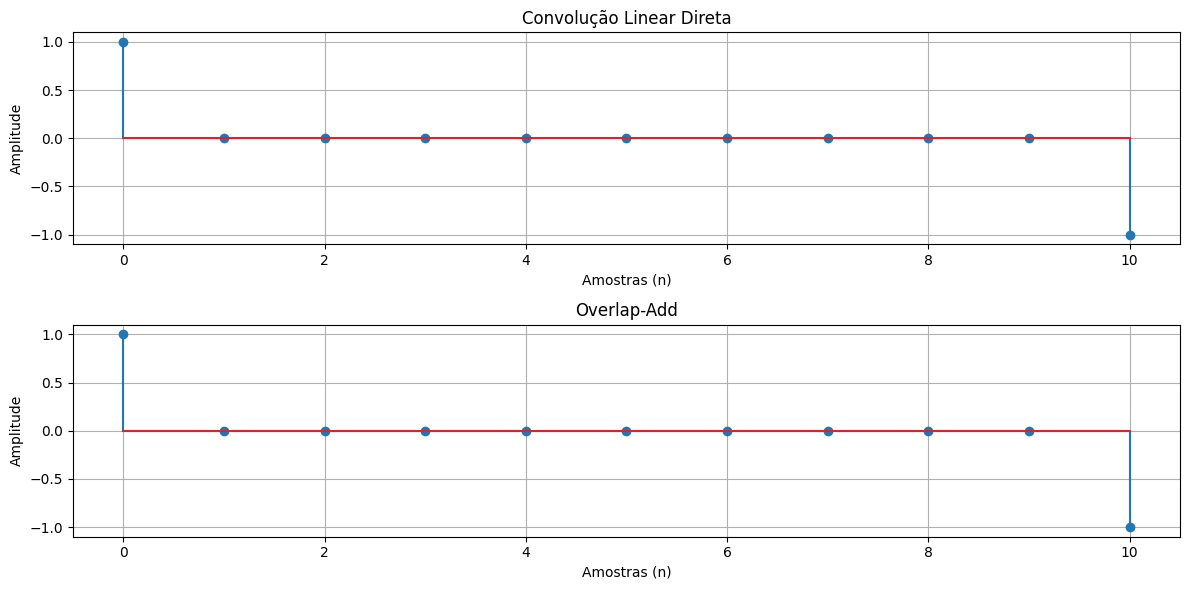

In [15]:
# Convolução linear direta para comparação
y_direto = np.convolve(x_n, h_n, mode='full')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(y_direto)
plt.title("Convolução Linear Direta")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(y[:len(y_direto)])
plt.title("Overlap-Add")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()

In [16]:
# Sinal aleatorio x(n) (exemplo com 100 amostras)
np.random.seed(0)
x = np.random.randn(100)

# Filtro FIR h(n) (comprimento L = 10)
h = np.array([0.1, 0.2, 0.3, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01])
L = len(h)

# Tamanho do bloco (M0) e DFT (N = M0 + L - 1), (N = 20 + 10 - 1 = 29)
M0 = 20
N = M0 + L - 1



Divisão do sinal

- $x(n)$ é dividido em blocos de tamanho $M_0$.

- O último bloco recebe zero-padding se ncessário.

In [17]:
# Divisão de x(n) em blocos
# Numero de blocos
num_blocos = int(np.ceil(len(x) / M0))

# Zero-padding no último bloco se necessário
x_padded = zero_padding(x, num_blocos * M0 - len(x))

# Divisão em blocos de tamanho M0
blocos = np.array_split(x_padded, num_blocos)


In [18]:
# blocos
for i, bloco in enumerate(blocos):
    print(f"Bloco {i + 1}: {bloco}")

Bloco 1: [ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]
Bloco 2: [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
  0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
 -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
 -0.38732682 -0.30230275]
Bloco 3: [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218 -0.4380743
 -1.25279536  0.77749036 -1.61389785 -0.21274028 -0.89546656  0.3869025
 -0.51080514 -1.18063218 -0.02818223  0.42833187  0.06651722  0.3024719
 -0.63432209 -0.36274117]
Bloco 4: [-0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253 

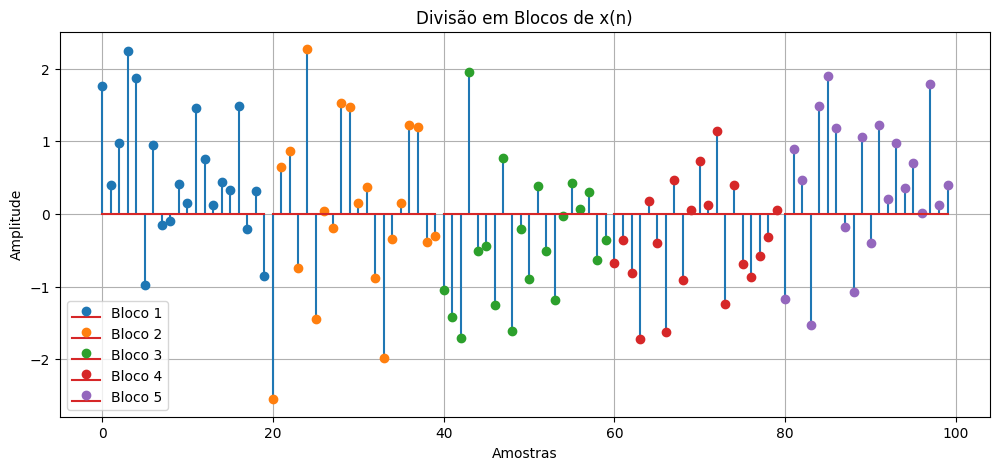

In [19]:
plt.figure(figsize=(12, 5))
for i, bloco in enumerate(blocos):
    plt.stem(range(i*M0, i*M0 + len(bloco)), bloco, label=f'Bloco {i+1}', linefmt='')
plt.title('Divisão em Blocos de x(n)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# zero-padding em h(n) para tamanho N
h_padded = zero_padding(h, N - L)
h_padded = zero_padding(h_padded) # garantir que seja potencia de 2

# fft do filtro h(n)
H = fft_dec(h_padded)

Processamento por Bloco (Convolução Circular com Zero-Padding)

- Cada bloco $x_m(n)$ é estendido primeiramente para $N = M_0 + L - 1$ amostras (zero-padding).

- Depois estende-se para amostras que seja potência de 2 (para usar a FFT implementada).

- A convolução circular de $x_m(n)$ com $h(n)$ é então calculada via FFT.

In [21]:
# armazenar as saídas dos blocos
y_blocos = []

for bloco in blocos:
    # Zero-padding no bloco para tamanho N
    x_bloco_padded = zero_padding(bloco, N - len(bloco))
    x_bloco_padded = zero_padding(x_bloco_padded)

    # FFT do bloco
    X = fft_dec(x_bloco_padded)

    Y = X * H

    # transformada inversa
    y_bloco = ifft(Y).real

    y_blocos.append(y_bloco)


Combinação dos Blocos (Overlap-Add)

- Os blocos de saída $y_m(n)$ têm sobreposição de $L - 1$ amostras

- Essas sobreposições são somadas para produzir o resultado final $y(n)$

In [22]:
# Inicializar o sinal de saída
y = np.zeros(num_blocos * M0 + L - 1)

# Sobrepõe e soma os blocos
for i, y_bloco in enumerate(y_blocos):
    inicio = i * M0
    fim = inicio + N
    # apenas os primeiros N elementos de y_bloco antes de adicionar
    y[inicio:fim] += y_bloco[:N]

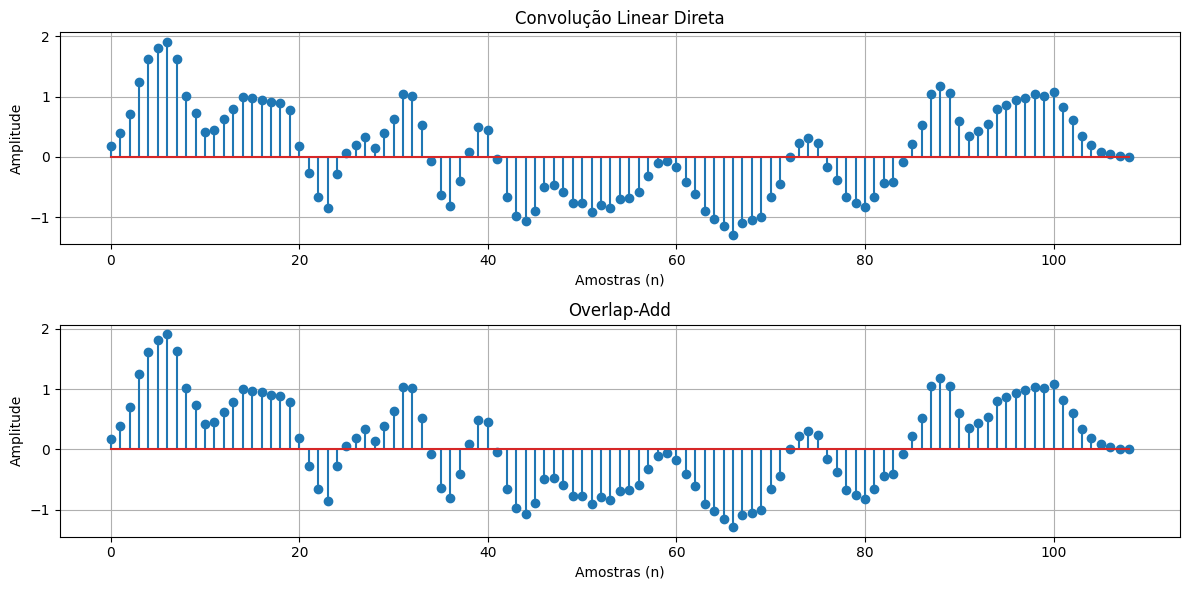

In [23]:
# Convolução linear direta para comparação
y_direto = np.convolve(x, h, mode='full')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(y_direto)
plt.title("Convolução Linear Direta")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(y)
plt.title("Overlap-Add")
plt.xlabel("Amostras (n)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()